#                                   1 INDIAN START-UP FUNDING ANALYSIS


## 1.1 Structure of Notebook

- **Business Understanding**
- **Data Understanding**
- **Data Preparation**
 

## 1.2 Business Understanding

The project aims to investigate and understand the funding dynamics within the Indian startup ecosystem over the years 2018 to 2021. By analyzing the provided datasets, which include details such as company names, sectors, funding amounts, and investor information, the goal is to discern patterns and trends in the distribution of funding across various sectors.
By focusing on different sectors, we seek to unravel insights into the variations in funding amounts and trends. This analysis is crucial for stakeholders, including investors, policymakers, and entrepreneurs, as it provides actionable intelligence on the distribution of financial support among diverse sectors, ultimately informing strategic decision-making within the dynamic landscape of the Indian startup ecosystem.

## 1.3 Import necessary libraries

In [1]:
#Data handling
import pandas as pd
import numpy as np
import pyodbc 
from dotenv import dotenv_values

#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway
from scipy import stats

#Hidding the warnings
import warnings 
warnings.filterwarnings('ignore')

## 1.4 Data Understanding
### Load Data

In [2]:

# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
database = environment_variables.get("DATABASE")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [3]:
# Establish a connection to the database using the provided connection string.
connection = pyodbc.connect(connection_string)


#### Load startup_funding2020 data

In [4]:

query = "Select * from dbo.LP1_startup_funding2020"
df_2020 = pd.read_sql(query, connection)

In [5]:
# Display the DataFrame
df_2020.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


#### Load startup_funding2021 data

In [6]:
query = "Select * from dbo.LP1_startup_funding2021"
df_2021 = pd.read_sql(query, connection)

In [7]:
# Display the DataFrame
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


#### Load startup_funding2019 data

In [8]:
df_2019 = pd.read_csv('startup_funding2019.csv')

# Display the DataFrame
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


#### Load startup_funding2018 data

In [9]:
df_2018 = pd.read_csv('startup_funding2018.csv')

# Display the DataFrame
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


### 1.4.1 Data Dictionary
The data is about startup funding 2018-2021 and below are the column variables and there defination

| Variable | Definition |
| --- | --- | 
| Company_Brand/Company Name| Brand or name of the company. |
|Founded | Year the company was established	| 
| HeadQuarter/Location|  Location of the company. |
| Sector/Industry | Industry category of the company. |
| What it does/About Company | Brief description of the company's primary business.|
| Founders | Individuals who established the company.|
| Investor | Entities or individuals who have invested in the company. |
| Amount | Funding amount received by the start-up | |
| Stage/Round/Series | Development stage of the company (e.g., early-stage, growth). |
| Column 10 |  |

### 1.4.2 Hypothesis

Null Hypothesis (H0): There is no significant difference in the amount of funding received by different sectors.
 
Alternative Hypothesis (Ha): There is a significant difference in the amount of funding received by different sectors.


### 1.4.3 Research Question
 
1. What is the overall trend in the total funding received by Indian start-ups from 2018 to 2021?
2. Which sectors or industries that have consistently attracted higher funding during this period?
3. Which are the top 10 startup names or brands that received most funding in the Indian startup scene from 2018 to 2021?
4. What is the correlation between amount of funds received and the stage/age of the start up?
5. Is the geographic location of a startup's headquarters a factor that impacts the funding it secures?




### 1.4.4 Data Preprocessing and cleaning

##### Startup-funding 2020 data

In [10]:
#Display concise information about DataFrame 
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


The dataset consists of 1055 rows and 10 columns. Non-null counts reveal the presence of missing values in several columns, with the 'column10' column having only 2 non-null entries. The data types include objects (strings) for most columns, while 'Founded' and 'Amount' are represented as float64. 

In [11]:
# Add a year column
df_2020['Year'] = 2020
df_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020


I added an year column to show what year the data is for.

In [12]:
# changing Amount to Amount($)
df_2020.rename(columns={'Amount'	: 'Amount($)'}, inplace=True)

In [13]:
df_2020.describe()

,Founded,Amount($),Year
count,842.000000,8.010000e+02,1055.0
mean,2015.363420,1.130430e+08,2020.0
std,4.097909,2.476635e+09,0.0
min,1973.000000,1.270000e+04,2020.0
25%,2014.000000,1.000000e+06,2020.0
50%,2016.000000,3.000000e+06,2020.0
75%,2018.000000,1.100000e+07,2020.0
max,2020.000000,7.000000e+10,2020.0


In [14]:
#count the number of missing values in each column for 2020
df_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount($)         254
Stage             464
column10         1053
Year                0
dtype: int64

df_2020 exhibits varying degrees of missing data across columns, with 'Stage' having the highest count of missing values (464), followed by 'Amount' (254) and 'Founded' (213).

In [15]:
# Select columns with data type 'object' or 'category' (common for categorical data)
categorical_columns = df_2020.select_dtypes(include=['object', 'category']).columns

# Print or inspect the names of categorical columns
print(categorical_columns)

Index(['Company_Brand', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders',
       'Investor', 'Stage', 'column10'],
      dtype='object')


### Data cleaning for 2020

In [16]:
#Dropping column10
df_2020.drop('column10', axis=1, inplace=True)
df_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Year'],
      dtype='object')

I dropped 'column10' because it had only two non-null entries, and its predominant null values provided limited meaningful information. Removing it streamlines the DataFrame and ensures a more focused exploration of meaningful features with sufficient data.

In [17]:
# Check for duplicates in the entire DataFrame
duplicates = df_2020.duplicated().sum()
duplicates

3

There 3 duplicates in the 2020 data which I chose to drop

In [18]:
# Drop duplicate rows from the DataFrame
df_2020 = df_2020.drop_duplicates()

# Print or inspect the DataFrame without duplicates
df_2020.shape


(1052, 10)

In [19]:
#checking for unique entries in amount
df_2020['Amount($)'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [20]:
df_2020['Amount($)'].isnull().sum()

253

In [21]:
# Calculate the median
median_amount = df_2020['Amount($)'].median()

# Fill null values with the median
df_2020['Amount($)'].fillna(median_amount, inplace=True)


The reason behind filling the Amount null values with median is that the median is a robust measure of central tendency, less sensitive to extreme values or outliers than the mean. In the context of startup funding, where amounts can vary significantly, using the median helps ensure a more representative fill value. However, it's important to acknowledge the limitations of this approach. Filling null values with the median assumes that the distribution of funding amounts is not heavily skewed or influenced by extreme values. 

In [22]:
df_2020['Amount($)'].isnull().sum()

0

In [23]:
df_2020['Amount($)'].dtype

dtype('float64')

In [24]:
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [25]:
# Corrections for 'HeadQuarter' entries in df_2020 with the correct spelling and Standardizing the names
corrections = {
    'Bangaldesh': 'Bangladesh',      
    'Cochin': 'Kochi',               
    'Rajastan': 'Rajasthan',         
    'Hyderebad': 'Hyderabad',        
    'Banglore': 'Bangalore',         
    'Bengaluru': 'Bangalore', 
    'San Francisco Bay Area': 'San Francisco',
    'Newcastle Upon Tyne': 'Newcastle',
    'San Franciscao': 'San Francisco',
    'New Delhi' : 'Delhi'

    

}

# Applying corrections to the 'HeadQuarter' column
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].replace(corrections)


 Some entries have spelling variations, and the corrections were made to standardize them, ensuring consistency.

In [26]:
# Extracting only the first name from the 'HeadQuarter' column
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].str.split(',').str[0]

# The code above splits the 'HeadQuarter' values by commas and keeps only the first part,
# effectively retaining the primary headquarters name in each row which we assume is the city that the headquarters are.
# This helps standardize the data and ensures consistency in the representation of headquarters.



In [27]:
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', None, 'Singapore',
       'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangladesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Trivandrum', 'Kochi', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing', 'Rajasthan',
       'Ludhiana', 'Dehradun', 'Tangerang', 'Berlin', 'Seattle', 'Riyadh',
       'Seoul', 'Bangkok', 'Kanpur', 'Chandigarh', 'Warangal', 'Odisha',
       'Bihar', 'Goa', 'Tamil Nadu', 'Uttar Pradesh', 'Bhopal',
       'Coimbatore'], dtype=object)

In [28]:
#check null values in HeadQuarter
df_2020['HeadQuarter'].isna().sum()

94

In [29]:
#replace all null values in the 'HeadQuarter' column with the string 'Unknown'.
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].fillna('Unknown')


In [30]:
#check unique values in Sector
df_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [31]:
# Corrections in sector column
corrections = {
    'HeathTech': 'HealthTech',
    'Heathtech': 'Healthtech',
    'Ecommerce': 'E-commerce',
    'SaaS\xa0\xa0startup': 'SaaS',
    'EdtTech': 'EdTech',
   
}

# Applying corrections to the 'Sector' column
df_2020['Sector'] = df_2020['Sector'].replace(corrections)


In [32]:
#check null values in Sector
df_2020['Sector'].isna().sum()

13

In [33]:
#replace all null values in the 'Sector' column with the string 'Unknown'.
df_2020['Sector'] = df_2020['Sector'].fillna('Unknown')

In [34]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    1052 non-null   object 
 3   Sector         1052 non-null   object 
 4   What_it_does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Amount($)      1052 non-null   float64
 8   Stage          590 non-null    object 
 9   Year           1052 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 90.4+ KB


In [35]:
#check for unique values in Stage
df_2020['Stage'].unique() 

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [36]:
# Corrections for 'Stage' entries in df_2020
corrections = {
    'Pre- series A': 'Pre-series A',
    'Pre series A1': 'Pre-series A-1',
    'Pre-seed Round': 'Pre-seed',
    'Seed round': 'Seed',
    'Seed Round & Series A': 'Seed',
    'Pre Seed': 'Pre-seed',
    'Seed Funding': 'Seed',
    'Pre seed Round': 'Pre-seed',
    'Angel Round': 'Angel',
    'Pre series A': 'Pre-series A',
    'Pre seed round': 'Pre-seed',
    'Pre series B': 'Pre-series B',
    'Pre series C': 'Pre-series C',
    'Mid series': 'Unknown',
    'Series C, D': 'Series C',
    
}

# Applying corrections to the 'Stage' column
df_2020['Stage'] = df_2020['Stage'].replace(corrections)


In [37]:
#Checking null values
df_2020['Stage'].isnull().sum()

462

In [38]:
#replace all null values in the 'Stage' column with the string 'Unknown'.
df_2020['Stage'] = df_2020['Stage'].fillna('Unknown')

Replacing null values with 'Unknown' in the 'Stage' column serves to maintain transparency about the absence or ambiguity of specific funding stage information. It avoids potentially misleading imputations, allowing stakeholders to recognize and account for the inherent uncertainties in the dataset. This approach fosters a more honest representation of the data, enhancing its reliability for investors and analysts making strategic decisions based on funding stages.

##### Startup-funding 2021 data

In [39]:
# Add a year column
df_2021['Year'] = 2021
df_2021.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021


In [40]:
# Display concise information about DataFrame for 2021
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


The DataFrame contains 1209 rows and 9 columns. Notably, there are missing values in various columns, including 'Founders,' 'Investor,' 'Amount,' and 'Stage,' as indicated by the non-null counts. Additionally, the 'Amount' column is currently of object type, suggesting potential inconsistencies or non-numeric entries that may need further exploration or cleaning.

In [41]:
#count the number of missing values in each column
df_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
Year               0
dtype: int64

The dataset exhibits missing values across various columns: 'Founded' and 'HeadQuarter' each have one missing entry, 'Founders' has four, 'Amount' has three, and 'Investor' has the highest count with 62 missing values. Furthermore, the 'Stage' column has a substantial number of missing entries, indicating a potential challenge in determining the developmental stage for a significant portion of the companies.

In [42]:
# display statistics for both numeric and non-numeric columns. The .T transposes the result for better readability.

description_all = df_2021.describe(include='all').T

# Print or inspect the transposed summary
description_all



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1209,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1208.0,NaN,NaN,NaN,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1208,70,Bangalore,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1209,254,FinTech,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1147,937,Inflection Point Ventures,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1206,278,$Undisclosed,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,781,31,Seed,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1209.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


The summary statistics reveal that the 'Company_Brand' column has 1209 entries, with 1033 unique brands, and 'BharatPe' is the most frequent brand, appearing 8 times. In the 'Founded' column, the data includes 1208 non-null values, ranging from 1963 to 2021, with a mean founding year of approximately 2016.7 and a standard deviation of 4.52 years. The 'HeadQuarter' column shows 70 unique locations, with 'Bangalore' being the most common, occurring 426 times. 'FinTech' is the most frequent sector in the 'Sector' column, appearing 122 times out of 1209 entries. The 'Investor' column has 1147 non-null entries, with 'Inflection Point Ventures' being the most frequent investor, appearing 24 times. In the 'Amount' column, there are 1206 non-null entries, and the most frequent amount category is '$Undisclosed', which occurs 73 times. The 'Stage' column indicates 781 non-null entries, with 'Seed' being the most frequent stage, occurring 246 times.

### Clean 2021 data

In [43]:
# changing Amount to Amount($)
df_2021.rename(columns={'Amount'	: 'Amount($)'}, inplace=True)

In [44]:


# Checking the frequency of each unique value in 'Amount($)'
value_counts = df_2021['Amount($)'].value_counts()


# Iterate through the items to print both unique values and their counts
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}")



Value: $Undisclosed, Count: 73
Value: $1000000, Count: 52
Value: Undisclosed, Count: 43
Value: $2000000, Count: 40
Value: $1,000,000, Count: 33
Value: $3000000, Count: 31
Value: $5000000, Count: 29
Value: $10000000, Count: 28
Value: $500000, Count: 25
Value: $undisclosed, Count: 22
Value: $200000, Count: 20
Value: $2,000,000, Count: 20
Value: $4000000, Count: 20
Value: $400000, Count: 18
Value: $200,000, Count: 17
Value: $3,000,000, Count: 17
Value: $300000, Count: 17
Value: $10,000,000, Count: 15
Value: $20000000, Count: 15
Value: $30000000, Count: 13
Value: $6000000, Count: 13
Value: $7000000, Count: 13
Value: $1200000, Count: 12
Value: $700000, Count: 12
Value: $5,000,000, Count: 12
Value: $500,000, Count: 11
Value: $1500000, Count: 11
Value: $15,000,000, Count: 11
Value: $100000000, Count: 11
Value: $4,000,000, Count: 10
Value: $50000000, Count: 10
Value: $600000, Count: 10
Value: $300,000, Count: 10
Value: $6,000,000, Count: 10
Value: $12000000, Count: 9
Value: $8000000, Count: 9


The output list includes various entries that are not valid monetary amounts in a standard format. These entries comprise a mix of undisclosed funding amounts, funding rounds such as "Series C" and "Seed," investor information like "ah! Ventures," and instances with typos and formatting errors such as "$,," and "$$1,55,000." Addressing these inconsistencies is crucial for accurate financial analysis and requires careful data cleaning and validation processes.

In [45]:
#Filter rows that have certain unique entries

keywords = ['Series C', 'Seed', 'Upsparks', 'JITO Angel Network, LetsVenture', 'ah! Ventures', 'Pre-series A', 'ITO Angel Network, LetsVenture', 'ah! Ventures']

filtered_rows = df_2021[df_2021['Amount($)'].str.contains('|'.join(keywords), case=False, na=False)]

print("Filtered Rows:")
filtered_rows.head(2)

Filtered Rows:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [46]:
#Doing corrections on the amount column by replacing entries with the correct ones which had mistakenly been placed other columns
corrections = {
    'Upsparks': '$1200000',
    'Series C':'$22000000',
    'Seed':'$5000000',
    'ah! Ventures': '$300000',
    'Pre-series A':'$1000000',
    'ITO Angel Network, LetsVenture':'$300000',
    'JITO Angel Network, LetsVenture':'$1000000',
    'Seed':'1000000'
}
# Applying corrections to the 'HeadQuarter' column
df_2021['Amount($)']= df_2021['Amount($)'].replace(corrections)


In [47]:
#Clean Amount Column and change it to float

# 1. Remove commas and dollar signs
df_2021['Amount($)'] = df_2021['Amount($)'].replace('[\$,]', '', regex=True)



In [48]:
# Replace 'Undisclosed', 'undisclosed', and null values with np.nan
df_2021['Amount($)'] = df_2021['Amount($)'].replace(['Undisclosed', 'undisclosed', None], np.nan)


In [49]:
# Convert the 'Amount' column to float
df_2021['Amount($)'] = df_2021['Amount($)'].replace('', np.nan).astype(float)


In [50]:
df_2021['Amount($)'].isnull().sum()



143

In [51]:
# Calculate the median
median_amount = df_2021['Amount($)'].median()

# Fill null values with the median
df_2021['Amount($)'].fillna(median_amount, inplace=True)

In [52]:
# Check for duplicates in the entire DataFrame
duplicates = df_2021.duplicated().sum()
duplicates

19

There are 19 duplicates in the 2021 data

In [53]:
# Drop duplicate rows from the DataFrame
df_2021 = df_2021.drop_duplicates()

In [54]:
df_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

The unique values in the 'HeadQuarter' column of df_2021 indicate diverse company locations, including major cities in India like Bangalore and Mumbai, as well as more specific or unconventional descriptions. However, the presence of irregularities like 'Pharmaceuticals\t#REF!' suggests potential data quality issues that might need cleaning. Additionally, variations and misspellings in entries, such as 'Ahmadabad' for 'Ahmedabad,' may require standardization for accurate analysis.

In [55]:

keywords = ['Gurugram\t#REF!', 'Pharmaceuticals\t#REF!', 'Online Media\t#REF!','Food & Beverages','Computer Games','Information Technology & Services']

filtered_rows = df_2021[df_2021['HeadQuarter'].str.contains('|'.join(keywords), case=False, na=False)]

print("Filtered Rows:")
filtered_rows


Filtered Rows:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",1200000.0,$1200000,2021
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,461000.0,Seed,2021
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,22000000.0,None,2021
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,1000000.0,None,2021
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,3500000.0,None,2021
1176,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,75000000.0,Series C,2021


In [56]:
#corrections of some headquater's entries that had anomalities
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace('Gurugram\t#REF!', 'Gurugram')
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace('Pharmaceuticals\t#REF!', 'Unknown')
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace('Online Media\t#REF!', 'Unknown')
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace('Telugana', 'Telangana')
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace('Computer Games' , 'Unknown' )
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace('Food & Beverages' , 'Hauz Khas')
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].replace('Information Technology & Services' , 'Manchester')


In [57]:
#Check null values
rows_with_null_headquarter = df_2021[df_2021['HeadQuarter'].isnull()]

# Display the rows and their content
print("Rows with Null HeadQuarter:")
rows_with_null_headquarter


Rows with Null HeadQuarter:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
29,Vidyakul,2018.0,None,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV",500000.0,Seed,2021


In [58]:
# Replace null values in 'HeadQuarter' with 'Unknown'
df_2021['HeadQuarter'].fillna('Unknown', inplace=True)



In [59]:
df_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [60]:
# Typo Corrections in sector
corrections = {
    'Helathcare': 'Healthcare',
    'Heathtech': 'Healthtech',
    'Foootwear': 'Footwear',
    'Aeorspace': 'Aerospace',
    'Healtcare': 'Healthcare'
}
df_2021['Sector'] = df_2021['Sector'].replace(corrections)


In [61]:
# List of keywords to search for in the 'Sector' column
keywords = [
    "Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience",
    "Manchester, Greater Manchester",
    "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.",
    "Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.",
    "Hauz Khas"
]

# Filter rows in the DataFrame where the 'Sector' column contains any of the keywords to check whether they have interchaged entries on other columns
filtered_rows = df_2021[df_2021['Sector'].str.contains('|'.join(keywords), case=False, na=False)]

# Display the filtered rows
print("Filtered Rows:")
filtered_rows.head(2)



Filtered Rows:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
241,MasterChow,2020.0,Hauz Khas,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,461000.0,Seed,2021
242,Fullife Healthcare,2009.0,Unknown,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,22000000.0,None,2021


Run the above code on the original data of 2021 and realised some of the columns names had been interchanged, so I did the corrections below.

In [62]:
#Doing corrections on the sector column by replacing entries with the correct ones which had mistakenly been placed other columns
corrections = {
    "Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience": "Online Media",
    "Manchester, Greater Manchester":"Information Technology & Services",
    "MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.":"Unknown",
    "Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.": "Pharmaceuticals",
    "Hauz Khas":"Food & Beverages",	
}
# Applying corrections to the 'Sector' column
df_2021['Sector']= df_2021['Sector'].replace(corrections)

In [63]:
df_2021['Sector'].isnull().sum()

0

In [64]:
#check for unique value in stage
df_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

As seen above there are some entries that don't belong to the stage column so they need to be removed.

In [65]:
# Correct the typo 
df_2021['Stage'] = df_2021['Stage'].replace('Seies A', 'Series A')
df_2021['Stage'] = df_2021['Stage'].replace('Series A+', 'Series A')
df_2021['Stage'] = df_2021['Stage'].replace('Seed+', 'Seed')


In [66]:
# List of values to search for in the 'Stage' column
target_values = ['$1200000', '$300000', '$6000000', '$1000000']

# Filter rows in the DataFrame where the 'Stage' column is in the list of target values
filtered_rows = df_2021[df_2021['Stage'].isin(target_values)]

# Display the filtered rows
print("Filtered Rows:")
filtered_rows

Filtered Rows:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
98,FanPlay,2020.0,Unknown,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",1200000.0,$1200000,2021
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,300000.0,$300000,2021
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",300000.0,$300000,2021
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,3500000.0,$6000000,2021
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000.0,$1000000,2021


Since I could not locate the true stages of above row, I replaced them with Unknown

In [67]:
# List of values to be replaced
target_values = ['$1200000', '$300000', '$6000000', '$1000000']

# Replace the target values in the 'Stage' column with 'Unknown'
df_2021['Stage'] = df_2021['Stage'].replace(target_values, 'Unknown')


In [68]:
df_2021['Stage'].isnull().sum()

421

In [69]:
# Replace null values in 'Stage' with 'Unknown'
df_2021['Stage'].fillna('Unknown', inplace=True)


In [70]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1190 non-null   object 
 3   Sector         1190 non-null   object 
 4   What_it_does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1129 non-null   object 
 7   Amount($)      1190 non-null   float64
 8   Stage          1190 non-null   object 
 9   Year           1190 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 102.3+ KB


##### Startup-funding 2019 data

In [71]:
# Add a year column
df_2019['Year'] = 2019


In [72]:
# Display concise information about DataFrame for 2019
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


The dataset contains 89 entries with varying degrees of completeness across columns, indicating missing values in columns such as 'Founded,' 'HeadQuarter,' 'Sector,' 'Founders,' and 'Stage.' Additionally, the 'Amount($)' column is currently of object type, suggesting that it may include non-numeric characters or a mix of data types that require further exploration or cleaning for meaningful analysis.

In [73]:
#count the number of missing values in each column
df_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
Year              0
dtype: int64

The dataset exhibits some missing values, with 'Founded' having 29 entries, 'HeadQuarter' having 19 entries, 'Sector' having 5 entries, 'Founders' having 3 entries, and 'Stage' having 46 entries without data. Notably, 'Amount($)' and 'Investor' columns have complete data.

### Data Cleaning

In [74]:
# replace company/Brand to company_brand
df_2019.rename(columns={'Company/Brand': 'Company_Brand'}, inplace=True)

In [75]:
# replace company/Brand to company_brand
df_2019.rename(columns={'What it does': 'What_it_does'}, inplace=True)

In [76]:
df_2019['Amount($)'].unique()

array(['$6,300,000 ', '$150,000,000 ', '$28,000,000 ', '$30,000,000 ',
       '$6,000,000 ', 'Undisclosed', '$1,000,000 ', '$20,000,000 ',
       '$275,000,000 ', '$22,000,000 ', '$5,000,000 ', '$140,500 ',
       '$540,000,000 ', '$15,000,000 ', '$182,700 ', '$12,000,000 ',
       '$11,000,000 ', '$15,500,000 ', '$1,500,000 ', '$5,500,000 ',
       '$2,500,000 ', '$140,000 ', '$230,000,000 ', '$49,400,000 ',
       '$32,000,000 ', '$26,000,000 ', '$150,000 ', '$400,000 ',
       '$2,000,000 ', '$100,000,000 ', '$8,000,000 ', '$100,000 ',
       '$50,000,000 ', '$120,000,000 ', '$4,000,000 ', '$6,800,000 ',
       '$36,000,000 ', '$5,700,000 ', '$25,000,000 ', '$600,000 ',
       '$70,000,000 ', '$60,000,000 ', '$220,000 ', '$2,800,000 ',
       '$2,100,000 ', '$7,000,000 ', '$311,000,000 ', '$4,800,000 ',
       '$693,000,000 ', '$33,000,000 '], dtype=object)

In [77]:

# Checking the frequency of each unique value in 'Amount($)'
value_counts = df_2019['Amount($)'].value_counts()


# Iterate through the items to print both unique values and their counts
for value, count in value_counts.items():
    print(f"Value: {value}, Count: {count}")

Value: Undisclosed, Count: 12
Value: $5,000,000 , Count: 6
Value: $1,500,000 , Count: 4
Value: $6,000,000 , Count: 4
Value: $1,000,000 , Count: 4
Value: $30,000,000 , Count: 3
Value: $20,000,000 , Count: 3
Value: $50,000,000 , Count: 3
Value: $4,000,000 , Count: 3
Value: $5,500,000 , Count: 3
Value: $26,000,000 , Count: 2
Value: $2,000,000 , Count: 2
Value: $12,000,000 , Count: 2
Value: $100,000 , Count: 2
Value: $5,700,000 , Count: 1
Value: $693,000,000 , Count: 1
Value: $4,800,000 , Count: 1
Value: $120,000,000 , Count: 1
Value: $311,000,000 , Count: 1
Value: $6,800,000 , Count: 1
Value: $36,000,000 , Count: 1
Value: $2,800,000 , Count: 1
Value: $220,000 , Count: 1
Value: $600,000 , Count: 1
Value: $7,000,000 , Count: 1
Value: $2,100,000 , Count: 1
Value: $70,000,000 , Count: 1
Value: $60,000,000 , Count: 1
Value: $8,000,000 , Count: 1
Value: $25,000,000 , Count: 1
Value: $6,300,000 , Count: 1
Value: $100,000,000 , Count: 1
Value: $11,000,000 , Count: 1
Value: $28,000,000 , Count: 1


The 'amount' column has values in different formats, such as 'Undisclosed' and amounts with dollar signs and commas. To clean this column and make it suitable for analysis, I followed these steps:

1.Replace 'Undisclosed' with NaN.

2.Remove dollar signs and commas from the numeric values.

3.Convert the values to numeric data type.

In [78]:

# Step 1: Replace 'Undisclosed' with NaN
df_2019['Amount($)'].replace('Undisclosed', np.nan, inplace=True)

# Step 2: Remove dollar signs and commas from numeric values
df_2019['Amount($)'] = df_2019['Amount($)'].replace('[\$,]', '', regex=True).astype(float)

# Step 3: Convert the values to numeric data type
df_2019['Amount($)'].fillna(df_2019['Amount($)'].median(), inplace=True)  # Fill NaN values with median


In [79]:
#Check if amount has missing values
df_2019['Amount($)'].isna().sum()

0

In [80]:
df_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [81]:
# Define a mapping for cleaning the 'HeadQuarter' column
location_mapping = {
    'New Delhi': 'Delhi',
    
}

# Replace values in the 'HeadQuarter' column based on the mapping
df_2019['HeadQuarter'] = df_2019['HeadQuarter'].replace(location_mapping)




In [82]:
#check null values
df_2019['HeadQuarter'].isnull().sum()

19

In [83]:
# Replace null values in'Headquarter' with 'Unknown'
df_2019['HeadQuarter'].fillna('Unknown', inplace=True)


In [84]:
df_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [85]:
# Define a mapping for cleaning the 'Sector' column
sector_mapping = {
    'Ecommerce': 'E-commerce',
    
}
# Replace values in the 'Sector' column based on the mapping
df_2019['Sector'] = df_2019['Sector'].replace(sector_mapping)


In [86]:
df_2019['Sector'].isna().sum()

5

In [87]:
# Replace null values in'Sector' with 'Unknown'
df_2019['Sector'].fillna('Unknown', inplace=True)


In [88]:
#check unique values in stage column
df_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [89]:
# Define a mapping for cleaning the 'Stage' column
stage_mapping = {
    'Seed round': 'Seed',
    'Seed fund': 'Seed',
    'Pre series A': 'Pre-series A',
    'Series B+': 'Series B',
    'Seed funding':'Seed'
    # Add more mappings as needed
}

# Replace values in the 'Stage' column based on the mapping
df_2019['Stage'] = df_2019['Stage'].replace(stage_mapping)



In [90]:
# Replace null values in'Stage' with 'Unknown'
df_2019['Stage'].fillna('Unknown', inplace=True)


In [91]:
df_2019.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     float64
 8   Stage          89 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.1+ KB


In [92]:
# Check for duplicates in the entire DataFrame
duplicates = df_2019.duplicated().sum()
duplicates

0

##### Startup-funding 2018 data

In [93]:
# Add a year column
df_2018['Year'] = 2018

In [94]:
# Display concise information about DataFrame for 2018
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


The dataset comprises 526 entries with complete information in all columns, including 'Company Name,' 'Industry,' 'Round/Series,' 'Amount,' 'Location,' and 'About Company.' All columns appear to be of object data type, suggesting they likely contain textual or categorical information.  For meaningful analysis, it might be beneficial to convert 'Amount' to a numeric data type (e.g., float) after addressing any non-numeric elements or formatting issues in the column.

### Data cleaning 2018

In [95]:
# replace column names to correspond with columns from other data
df_2018.rename(columns={'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Amount':'Amount($)','Location':'HeadQuarter','About Company':'What_it_does'}, inplace=True)

In [96]:
#count the number of missing values in each column
df_2018.isnull().sum()

Company_Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
What_it_does     0
Year             0
dtype: int64

The dataset is complete, containing 0 missing values across all columns.

In [97]:
# Check for duplicates in the entire DataFrame
duplicates =df_2018 [df_2018.duplicated(keep=False)]
duplicates

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018


There is one duplicated column which was dropped.

In [98]:
# Drop duplicate rows from the DataFrame
df_2018 = df_2018.drop_duplicates()



In [99]:
df_2018['HeadQuarter'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [100]:
#This script uses a dictionary (corrections) to map incorrect values to corrected values and then applies these corrections to the 'LHeadQuarter' column. 
corrections = {
    'Bangalore City, Karnataka, India': 'Bengaluru, Karnataka, India',
    'Hyderabad, Andhra Pradesh, India': 'Hyderabad, Telangana, India',
    'Cochin, Kerala, India': 'Kochi, Kerala, India',
    'Uttar Pradesh, India, Asia': 'Uttar Pradesh, India',
    'Kormangala, Karnataka, India': 'Koramangala, Karnataka, India',
    'India, Asia': 'Unknown',
    'New Delhi, Delhi, India':'Delhi, Delhi, India'
}
# Apply corrections
df_2018['HeadQuarter']  = df_2018['HeadQuarter'] .replace(corrections)

# Display unique values to verify corrections
df_2018['HeadQuarter']


0      Bangalore, Karnataka, India
1       Mumbai, Maharashtra, India
2          Gurgaon, Haryana, India
3      Noida, Uttar Pradesh, India
4      Hyderabad, Telangana, India
                  ...             
521    Bangalore, Karnataka, India
522        Haryana, Haryana, India
523     Mumbai, Maharashtra, India
524     Mumbai, Maharashtra, India
525     Chennai, Tamil Nadu, India
Name: HeadQuarter, Length: 525, dtype: object

In [101]:
# Extract the first name from the 'headquarter' column
df_2018['HeadQuarter'] = df_2018['HeadQuarter'].apply(lambda x: x.split(', ')[0] if pd.notnull(x) else None)
# Replace Bengaluru with Bangalore since they are the same city just different spelling
df_2018['HeadQuarter'] = df_2018['HeadQuarter'].replace({'Bengaluru': 'Bangalore'})


df_2018['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'Unknown', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Kochi', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum',
       'Ernakulam', 'Koramangala', 'Uttar Pradesh', 'Andheri', 'Mylapore',
       'Ghaziabad', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal',
       'Coimbatore', 'Worli', 'Alleppey', 'Chandigarh', 'Guindy',
       'Lucknow'], dtype=object)

The reason for extracting only the first name from the 'headquarter' column, which originally contained complete addresses including cities, states, and countries, is to standardize the data and make it consistent with the format used in other tables. 

In [102]:
df_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [103]:
# Replace specific values in the 'Stage' column
df_2018['Stage'] = df_2018['Stage'].replace({
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593': 'Unknown',
    'Venture - Series Unknown': 'unknown',
    'Undisclosed': 'Unknown'
})


In [104]:

unique_amount = df_2018['Amount($)'].unique()

# Print unique values and their counts
for amount in unique_amount:
    print(f"Value: {amount}, Count: {df_2018[df_2018['Amount($)'] == amount].shape[0]}")


Value: 250000, Count: 5
Value: ₹40,000,000, Count: 6
Value: ₹65,000,000, Count: 1
Value: 2000000, Count: 12
Value: —, Count: 148
Value: 1600000, Count: 2
Value: ₹16,000,000, Count: 2
Value: ₹50,000,000, Count: 9
Value: ₹100,000,000, Count: 3
Value: 150000, Count: 3
Value: 1100000, Count: 4
Value: ₹500,000, Count: 1
Value: 6000000, Count: 2
Value: 650000, Count: 2
Value: ₹35,000,000, Count: 5
Value: ₹64,000,000, Count: 2
Value: ₹20,000,000, Count: 8
Value: 1000000, Count: 24
Value: 5000000, Count: 7
Value: 4000000, Count: 7
Value: ₹30,000,000, Count: 4
Value: 2800000, Count: 1
Value: 1700000, Count: 1
Value: 1300000, Count: 3
Value: ₹5,000,000, Count: 3
Value: ₹12,500,000, Count: 2
Value: ₹15,000,000, Count: 2
Value: 500000, Count: 13
Value: ₹104,000,000, Count: 1
Value: ₹45,000,000, Count: 2
Value: 13400000, Count: 1
Value: ₹25,000,000, Count: 2
Value: ₹26,400,000, Count: 1
Value: ₹8,000,000, Count: 1
Value: ₹60,000, Count: 1
Value: 9000000, Count: 1
Value: 100000, Count: 2
Value: 2000

1. The values in the dataset appear to represent funding amounts, with a mix of numeric values, currency symbols (e.g., ₹ for Indian Rupees, $ for US Dollars), and some entries denoted as '—' (possibly indicating missing or undisclosed values).

2. There is a variation in the representation of numeric values, including comma-separated and non-comma-separated formats, as well as different scales (e.g., thousands, millions, billions).

3. Some entries contain irregular characters, such as commas within numeric values, which might require cleaning for consistency.

4. The dataset also includes a mix of local and international currencies, which may need normalization for accurate analysis or comparison of funding amounts.

In [105]:
# Define the average conversion rate from rupees to dollars in2018
conversion_rate = 0.146

# Function to convert values to dollars
def convert_to_dollars(value, conversion_rate):
    try:
        # Check if the value is not NaN
        if pd.notna(value):
            # Check if the value is a string
            if isinstance(value, str):
                # If the value contains '₹', convert it to dollars
                if '₹' in value:
                    amount_in_rupees = float(value.replace('₹', '').replace(',', ''))
                    amount_in_dollars = amount_in_rupees * conversion_rate
                    return amount_in_dollars
                # If the value is '—', return NaN
                elif value == '—':
                    return np.nan
                # If the value is already in dollars, remove commas and return it
                else:
                    return float(value.replace(',', '').replace('$', ''))
            # If the value is already a numeric value, return it as is
            elif isinstance(value, (int, float)):
                return value
        # If the value is NaN, return None
        return None
    # Handle the ValueError (e.g., when conversion to float fails)
    except ValueError:
        return None

# Apply the conversion function to the 'Amount($)' column
df_2018['Amount($)'] = df_2018['Amount($)'].apply(lambda x: convert_to_dollars(x, conversion_rate))


df_2018['Amount($)']

0         250000.0
1        5840000.0
2        9490000.0
3        2000000.0
4              NaN
          ...     
521    225000000.0
522            NaN
523         7500.0
524      5110000.0
525     35000000.0
Name: Amount($), Length: 525, dtype: float64

In [106]:
df_2018['Amount($)'].isnull().sum()

148

In [107]:
# Calculate the median
median_amount = df_2018['Amount($)'].median()

# Fill null values with the median
df_2018['Amount($)'].fillna(median_amount, inplace=True)

In [108]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Sector         525 non-null    object 
 2   Stage          525 non-null    object 
 3   Amount($)      525 non-null    float64
 4   HeadQuarter    525 non-null    object 
 5   What_it_does   525 non-null    object 
 6   Year           525 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 32.8+ KB


In [109]:
df_2018['Sector'].unique()


array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [110]:
df_2018['Sector']=df_2018['Sector'].replace('—','Unknown')

In [111]:
# Split the 'Sector' column based on commas and spaces, and keep only the first word
df_2018['Sector'] = df_2018['Sector'].str.split(',').str[0].str.strip()

# Display the unique values in the 'Sector' column after cleaning
print("Cleaned 'Sector' Column:")
print(df_2018['Sector'].unique())


Cleaned 'Sector' Column:
['Brand Marketing' 'Agriculture' 'Credit' 'Financial Services'
 'E-Commerce Platforms' 'Cloud Infrastructure' 'Internet'
 'Market Research' 'Information Services' 'Mobile Payments' 'B2B' 'Apps'
 'Food Delivery' 'Industrial Automation' 'Automotive' 'Finance'
 'Accounting' 'Artificial Intelligence' 'Internet of Things'
 'Air Transportation' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software' 'Logistics' 'Insurance' 'Information Technology'
 'Blockchain' 'Education' 'E-Commerce' 'Renewable Energy' 'E-Learning'
 'Clean Energy' 'Transportation' 'Fitness' 'Hospitality'
 'Media and Entertainment' 'Broadcasting' 'EdTech' 'Health Care' 'Unknown'
 'Sports' 'Big Data' 'Cloud Computing' 'Food Processing'
 'Trading Platform' 'Consumer Goods' 'Wellness' 'Fashion' 'Consulting'
 'Biotechnology' 'Communities' 'Consumer' 'Consumer Applications' 'Mobile'
 'Advertising' 'Marketplace' 'Aerospace' 'Home Decor' 'Energy'
 'Digital Marketing' 'Creative Agency' 'Consumer Le

I opted to retain only the first word in the 'Sector' column to ensures consistency and similarity with the rest of the data. However, this approach has limitations, since one can lose important iformation and oversimplifying the representation of companies operating in multiple sectors. 

In [112]:
df_2018['Sector'].isnull().sum()

0

In [113]:
#convert 2021 and 2020 dataset to csv files to ease concatenation of all the datasets. 
df_2021.to_csv('startup_funding_2021.csv', index=False)
df_2020.to_csv('startup_funding_2020.csv', index=False)

### dropping of the unwanted columns

In [114]:
# Drop specified columns from each DataFrame
columns_to_drop = ['Founded', 'Founders', 'Investor']
df_2021 = df_2021.drop(columns=columns_to_drop, errors='ignore')
df_2020 = df_2020.drop(columns=columns_to_drop, errors='ignore')
df_2019 = df_2019.drop(columns=columns_to_drop, errors='ignore')
df_2018 = df_2018.drop(columns=columns_to_drop, errors='ignore')


I dropped the above columns because I did not need them for my analysis

### Concatenate the DataFrames

In [115]:

# Concatenate the DataFrames
startup_funding_df = pd.concat([df_2018, df_2019, df_2020, df_2021], ignore_index=True)

# Display the concatenated DataFrame
startup_funding_df .head()


,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,5840000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,9490000.0,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,3530000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


In [116]:
startup_funding_df .shape

(2856, 7)

In [117]:
startup_funding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2856 non-null   object 
 1   Sector         2856 non-null   object 
 2   Stage          2856 non-null   object 
 3   Amount($)      2856 non-null   float64
 4   HeadQuarter    2856 non-null   object 
 5   What_it_does   2856 non-null   object 
 6   Year           2856 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 156.3+ KB


In [118]:
startup_funding_df['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'Unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mo

In [119]:
# Clean the 'Sector' column first if you haven't already
startup_funding_df['Cleaned_Sector'] = startup_funding_df['Sector'].str.lower().str.strip()

# Define keywords
keywords = ['food', 'foodtech', 'beverages','catering', 'cooking', 'dairy', 'qsr', 'craft beer', 'beverage']

# Filter rows containing specified keywords and replace them with 'Food and Beverages'
startup_funding_df.loc[startup_funding_df['Cleaned_Sector'].str.contains('|'.join(keywords)), 'Sector'] = 'Food and Beverages'

# Drop the temporary 'Cleaned_Sector' column if you no longer need it
startup_funding_df = startup_funding_df.drop(columns=['Cleaned_Sector'])





In [120]:

# Clean the 'Sector' column first if you haven't already
startup_funding_df['Cleaned_Sector'] = startup_funding_df['Sector'].str.lower().str.strip()

# Define keywords
health_keywords = ['health', 'wellness', 'hospital', 'pharma', 'nutrition', 'fitness', 'healthcare', 'healthtech', 'heathtech', 'healthcare', 'beauty', 'skincare startup', 'personal care startup', 'beauty products', 'pet care']

# Filter rows containing specified health-related keywords
health_rows = startup_funding_df[startup_funding_df['Cleaned_Sector'].str.contains('|'.join(health_keywords))]

# Replace the 'Sector' column in the original DataFrame with "Health and Wellness" for the selected rows
startup_funding_df.loc[health_rows.index, 'Sector'] = 'Health and Wellness'

# Drop the temporary 'Cleaned_Sector' column if you no longer need it
startup_funding_df.drop(columns=['Cleaned_Sector'], inplace=True)




In [121]:
# Clean the 'Sector' column first if you haven't already
startup_funding_df['Cleaned_Sector'] = startup_funding_df['Sector'].str.lower().str.strip()

ecommerce_categories = [
    'e-commerce platforms',
    'e-commerce',
    'e-commerce',
    'e-marketplace',
    'e-commerce & ar',
    'e-market',
    'estore',
    'e-mobility',
    'e-store',
    'e-connect',
    'e-learning',
    'd2c',
    'd2c business',
    'd2c startup',
    'nft marketplace'
]
# Filter rows containing specified health-related keywords
e_commerce_rows = startup_funding_df[startup_funding_df['Cleaned_Sector'].str.contains('|'.join(ecommerce_categories))]

# Replace the 'Sector' column in the original DataFrame with "Health and Wellness" for the selected rows
startup_funding_df.loc[e_commerce_rows.index, 'Sector'] = 'E-Commerce'

# Drop the temporary 'Cleaned_Sector' column if you no longer need it
startup_funding_df.drop(columns=['Cleaned_Sector'], inplace=True)


In [122]:
startup_funding_df['Sector'].shape

(2856,)

In [123]:
def categorize_sector(sector):
    # Define a dictionary mapping keywords to categories
    category_mapping = {
        'finance_and_banking': ['credit', 'financial services', 'banking', 'credit cards', 'insuretech', 'insurance',
                                'venture capital', 'funding platform', 'infratech', 'insurance technology',
                                'online financial service', 'finance', 'accounting', 'wealth management', 'finance company', 'neo-banking',
                                'investment', 'investment banking', 'investment management', 'company-as-a-service', 'capital markets', 'crowdfunding','crowdsourcing'],

        'health_and_wellness': ['health and wellness', 'medical', 'healthtech', 'medtech', 'healthcare', 'medical device',
                                'alternative medicine', 'dental', 'dietary supplements', 'veterinary','hygiene management','sanitation solutions','hygiene',
                                'pollution control equipment','pollutin control equipment'],

        'energy_and_environment': ['renewable energy', 'clean energy', 'energy', 'environmental consulting', 'renewable player',
                                    'cleantech', 'solar solution', 'solar monitoring company', 'environmental services', 
                                    'renewables & environment', 'solar solution', 'solar','electricity', 'oil and energy','environmental service'],

        'automotive_and_transportation': ['automotive', 'air transportation', 'autonomous vehicles', 'aerospace', 'autonomous vehicles',
                                          'electric vehicle', 'last mile transportation', 'electric vehicle', 'automobile',
                                          'automobile technology', 'automobile & technology', 'automotive tech', 'ev startup',
                                          'electric vehicle','automotive startup','car service','bike marketplace','car trade','tyre management',
                                          'automotive company','micro-mobility','ev','mobility','aviation','bike rental'],

        'agriculture_and_food': ['agriculture', 'agtech', 'farming', 'agriculture/commerce', 'agritech', 'dairy startup', 'fertility tech',
                                  'agritech startup', 'agri tech', 'agritech/commerce'],

        'media_and_entertainment': ['media and entertainment', 'broadcasting', 'digital entertainment', 'entertainment', 'media tech',
                                     'content management', 'content marketplace', 'content publishing', 'content commerce',
                                     'innovation management', 'content creation', 'podcast', 'celebrity engagement', 'digital platform',
                                     'social audio', 'social commerce', 'social network', 'social media','digital media', 'music', 'music streaming',
                                     'video sharing platform', 'gaming startup', 'video streaming platform', 
                                     'video platform', 'visual media', 'social audio', 'content creation', 'content publishing', 'nft', 'ott','video platform', 'fm', 'video'],

        'education_and_learning': ['education', 'e-learning', 'edtech', 'edtech startup', 'continuing education', 'higher education',
                                   'language learning', 'skill development', 'training', 'job portal','education management','edtech'],

        'retail_and_consumer_goods': ['retail', 'consumer goods', 'consumer', 'consumer applications', 'consumer electronics',
                                      'consumer lending', 'consumer services', 'consumer software', 'consumer applications',
                                      'retail aggregator', 'retail tech','retail startup','merchandise'],

        'real_estate_and_construction': ['real estate', 'construction', 'commercial real estate', 'proptech', 'co-living', 'co-working',
                                          'coworking', 'rental space', 'co-working startup', 'housing', 
                                          'housing & rentals', 'housing marketplace', 'furniture rental','rental'],

        'travel_and_tourism': ['travel', 'tourism', 'business travel', 'travel tech', 'online portals', 'location analytics'],

        'fashion_and_lifestyle': ['fashion', 'lifestyle', 'fashion startup', 'fashion tech', 'fashion and lifestyle', 'd2c fashion','d2c jewellery','jewellery',
                                  'clothing','footwear','eyewear','cosmetics'],

        'environmental_services': ['environmental services', 'environmental consulting', 'environmental service', 'pollution control equipment'],

        'marketing_and_advertising': ['marketing', 'brand marketing', 'marketing startup', 'marketing & advertising', 'advertising',
                                      'advertisement', 'digital marketing', 'creative agency', 'content management', 'content marketplace', 
                                      'marketing company', 'marketing startup', 'marketing & customer loyalty', 'sales and marketing'],

        'logistics_and_supply_chain': ['logistics', 'supply chain', 'supply chain platform', 'logistics & supply chain'
                                        'transportation', 'delivery service', 'logistics & supply chain', 'transport & rentals', 
                                        'transport automation', 'mobility/transport'],

        'telecommunication_and_networking': ['telecommunication', 'networking', 'telecommunications', 'networking platform'],

        'manufacturing_and_industrial': ['manufacturing', 'industrial', 'industrial automation', '3d printing', 'manufacturing startup',
                                         'mechanical & industrial engineering'],

        'b2b_services': ['b2b', 'b2b startup', 'b2b e-commerce', 'b2b manufacturing', 'b2b travel', 'b2b service'],

        'sports_and_gaming': ['sports', 'sports startup', 'fantasy sports', 'gaming', 'gaming startup', 'e-sports','basetball','games','esports','sports']
    }
    
    # Convert sector to lowercase for case-insensitive comparison
    sector_lower = sector.lower()

    # Iterate through the categories and return the matching category
    for category, keywords in category_mapping.items():
        if sector_lower in keywords:
            return category
    
    # Return the original sector when no match is found
    return sector

# Apply the categorize_sector function to create a new 'Category' column
startup_funding_df['Sector'] = startup_funding_df['Sector'].apply(categorize_sector)


In [124]:
startup_funding_df['Sector'].unique()

array(['marketing_and_advertising', 'agriculture_and_food',
       'finance_and_banking', 'E-Commerce', 'Cloud Infrastructure',
       'Internet', 'Market Research', 'Information Services',
       'Mobile Payments', 'b2b_services', 'Apps', 'Food and Beverages',
       'manufacturing_and_industrial', 'automotive_and_transportation',
       'Artificial Intelligence', 'Internet of Things',
       'Enterprise Software', 'logistics_and_supply_chain',
       'Information Technology', 'Blockchain', 'education_and_learning',
       'energy_and_environment', 'Transportation', 'health_and_wellness',
       'media_and_entertainment', 'Unknown', 'sports_and_gaming',
       'Big Data', 'Cloud Computing', 'Trading Platform',
       'retail_and_consumer_goods', 'fashion_and_lifestyle', 'Consulting',
       'Biotechnology', 'Communities', 'Mobile', 'Marketplace',
       'Home Decor', 'Embedded Systems', 'Software', 'Events',
       'Classifieds', 'Enterprise Resource Planning (ERP)', 'Audio',
       '

In [125]:

# List of technology-related keywords
tech_keywords = [
    'artificial intelligence', 'tech', 'cloud', 'artificial', 'data', 'internet', 'things', 'apps', 'android', 'software',
    'computer', 'mobile', '3d printing', 'funding platform', 'applications', 'file', 'embedded systems',
    'portals', 'fraud detection', 'search engine', 'nanotechnology', 'security', 'saas', 'bit company',
    'augmented reality', 'drone', 'ar startup', 'baas', 'app', 'virtual', 'it startup',
    'photonics', 'e tailor', 'ai & debt', 'ai company', 'ai chatbot', 'iot startup', 'ai startup',
    'digital platform', 'paas startup', 'taas startup', 'digital assistant' 'blockchain', 'ai', 'iot', 
    'robotics & ai', 'ar/vr', 'automation', 'ai platform', 'conversational ai platform', 'ai robotics', 'machine learning', 'mlops platform'
]

# Categorize 'Sector' column
startup_funding_df['Sector'] = startup_funding_df['Sector'].apply(lambda x: 'technology' if any(keyword.lower() in x.lower() for keyword in tech_keywords) else x)




In [126]:
startup_funding_df['Sector'].unique()

array(['marketing_and_advertising', 'agriculture_and_food',
       'finance_and_banking', 'E-Commerce', 'technology',
       'Market Research', 'Information Services', 'b2b_services',
       'Food and Beverages', 'manufacturing_and_industrial',
       'automotive_and_transportation', 'education_and_learning',
       'energy_and_environment', 'Transportation', 'health_and_wellness',
       'Unknown', 'sports_and_gaming', 'Trading Platform',
       'fashion_and_lifestyle', 'Consulting', 'Communities',
       'Marketplace', 'Home Decor', 'Events', 'Classifieds',
       'Enterprise Resource Planning (ERP)', 'Audio', 'Government',
       'Business Intelligence', 'Children',
       'real_estate_and_construction', 'travel_and_tourism', 'Analytics',
       'Facilities Support Services', 'Business Development',
       'Human Resources', 'Customer Service', 'Collaboration', 'Delivery',
       'Basketball', 'Cryptocurrency', 'Wedding', 'Career Planning',
       'Commercial', 'Smart Cities', 'Chil

In [127]:
startup_funding_df['Sector'] = startup_funding_df['Sector'].str.lower()

def categorize_sector(sector):
    sector_mapping = {
        'finance_and_banking': ['marketing_and_advertising', 'finance_and_banking', 'online financial service', 'finance', 'accounting',
                                'wealth management', 'finance company', 'neo-banking', 'investment', 'investment banking',
                                'investment management', 'company-as-a-service', 'capital markets', 'crowdfunding', 'crowdsourcing',
                                'cryptocurrency', 'mutual funds', 'escrow', 'venture capitalist', 'online credit management startup', 'equity management', 
                                'digital mortgage','crypto','venture capital & private equity','taxation'],

        'health_and_wellness': ['health_and_wellness', 'medical', 'healthtech', 'medtech', 'healthcare', 'medical device',
                                'alternative medicine', 'dental', 'dietary supplements', 'veterinary', 'hygiene management',
                                'sanitation solutions', 'hygiene','healthcare', 'eye wear', 'personal care','eyeglasses','heathcare','biomaterial startup'],

        'technology': ['technology', 'information services', 'business intelligence', 'it', 'nano distribution network', 'media', 'hr', 
                       'smart cities','ar platform','startup laboratory','robotics','api platform','analytics'],

        'e_commerce': ['e-commerce', 'trading platform',  'classifieds','enterprise resource planning (erp)','commerce','e store'],

        'energy_and_environment': ['energy_and_environment', 'renewable energy', 'clean energy', 'environmental consulting',
                                   'renewables & environment', 'solar solution', 'electricity', 'oil and energy', 'environmental service','electronics',
                                   'pollution control equiptment','pollution control equipment', 'pollutin control equipment'],

        'automotive_and_transportation': ['automotive_and_transportation', 'automotive startup', 'car service', 'bike marketplace', 'car trade',
                                          'tyre management', 'automotive company', 'micro-mobility', 'ev', 'mobility', 'aviation', 'bike rental',
                                          'aero company', 'transport', 'maritime', 'aviation & aerospace','wl & rac protection','defense & space','emobility', 
                                          'automotive and rentals'],

        'agriculture_and_food': ['agriculture_and_food', 'agritech', 'dairy startup', 'fertility tech', 'agritech startup', 'agri tech', 'agritech/commerce',
                                 'milk startup','tobacco','cannabis startup','fishery'],

        'media_and_entertainment': ['media_and_entertainment', 'music', 'music streaming', 'video sharing platform', 'gaming startup',
                                    'video streaming platform', 'video platform', 'visual media', 'social audio', 'content creation',
                                    'content publishing', 'nft', 'ott', 'video platform', 'fm', 'video','news', 'publication', 
                                    'media & networking', 'content marketplace', 'blogging', 'online storytelling','online games','product studio','audio','content marktplace'],

        'education_and_learning': ['education_and_learning', 'e-learning', 'edtech', 'edtech startup', 'continuing education', 'higher education',
                                   'language learning', 'skill development', 'training', 'job portal', 'education management', 'edtech','preschool daycare'],

        'retail_and_consumer_goods': ['retail_and_consumer_goods', 'retail startup', 'merchandise','sles and marketing', 'reatil startup',
                                      'retail_and_consumer_goods','crm','sales & services','wholesale'],

        'real_estate_and_construction': ['real_estate_and_construction', 'construction', 'commercial real estate', 'proptech', 'co-living', 'co-working',
                                         'coworking', 'rental space', 'co-working startup', 'housing', 'housing & rentals', 'housing marketplace',
                                         'furniture rental', 'rental','home interior services','interior design', 'accomodation','home decor','interior & decor'],

        'travel_and_tourism': ['travel_and_tourism', 'tourism', 'business travel', 'travel tech', 'online portals', 'location analytics'],

        'fashion_and_lifestyle': ['fashion_and_lifestyle', 'fashion startup', 'fashion tech', 'd2c fashion', 'd2c jewellery', 'jewellery',
                                  'clothing', 'footwear', 'eyewear', 'cosmetics','jewellery startup','fashion & lifestyle'],

        'environmental_services': ['environmental_services', 'environmental consulting', 'environmental service', 'pollution control equipment',
                                   'water purification'],

        'marketing_and_advertising': ['marketing_and_advertising', 'marketing', 'brand marketing', 'marketing startup', 'advertising', 'advertisement',
                                      'digital marketing', 'creative agency', 'content management', 'content marketplace', 'marketing company',
                                      'marketing startup', 'marketing & customer loyalty', 'sales and marketing','entreprenurship', 'marketplace','market research'],

        'logistics_and_supply_chain': ['logistics_and_supply_chain', 'logistics', 'supply chain', 'supply chain platform', 'logistics & supply chain',
                                       'transportation', 'delivery service', 'logistics & supply chain', 'transport & rentals', 'transport automation',
                                       'mobility/transport'],

        'telecommunication_and_networking': ['telecommunication_and_networking', 'telecommunication', 'networking', 'telecommunications', 'networking platform',
                                             'telecommuncation'],

        'manufacturing_and_industrial': ['manufacturing_and_industrial', 'manufacturing', 'industrial', 'industrial automation', '3d printing',
                                         'manufacturing startup', 'mechanical & industrial engineering','battery design','mechanical or industrial engineering',
                                         'packaging solution startup','battery','packaging services','textiles','battery manufacturer','warehouse','design','oil & energy','deisgning'],

        'b2b_services': ['b2b_services', 'b2b startup', 'b2b e-commerce', 'b2b manufacturing', 'b2b travel', 'b2b service','b2b marketplace'],

        'sports_and_gaming': ['sports_and_gaming', 'sports startup', 'fantasy sports', 'gaming', 'gaming startup', 'e-sports', 'basketball', 'games',
                              'esports', 'sports'],

        'food_and_beverages': ['food and beverages'],
        'services_and_support': [ 'facilities support services', 'business development', 'human resources', 'customer service', 
                                 'collaboration', 'delivery','career planning','commercial','child care', 'work fulfillment',
                                'customer service company', 'service industry', 'recruitment', 'consultancy', 'home services','facilities services',
                                 'sales and distribution', 'legal services', 'management consulting','staffing & recruiting','recruitment startup',
                                 'business supplies & equipment','consumer service','job discovery platform','consulting'],


        'social_and_community': ['social community','community','social platform','cultural','arts & crafts','dating','matrimony','children','government',
                                 'wedding','Community platform','legal','linguistic spiritual','communities','events','advisory firm']

    }
#Convert the sector to lowercase for case-insensitive matching
    sector_lower = sector.lower()

    for category, categories_list in sector_mapping.items():
        for category_name in categories_list:
            if category_name in sector_lower:
                return category

    return sector  # Return the original sector when no match is found
# Apply the categorize_sector function to create a new 'Category' column
startup_funding_df['Sector'] = startup_funding_df['Sector'].apply(categorize_sector)


In [128]:
startup_funding_df['Sector'].unique()

array(['finance_and_banking', 'agriculture_and_food', 'e_commerce',
       'technology', 'marketing_and_advertising', 'b2b_services',
       'automotive_and_transportation', 'manufacturing_and_industrial',
       'education_and_learning', 'energy_and_environment',
       'health_and_wellness', 'unknown', 'sports_and_gaming',
       'fashion_and_lifestyle', 'services_and_support',
       'real_estate_and_construction', 'media_and_entertainment',
       'social_and_community', 'travel_and_tourism',
       'telecommunication_and_networking', 'retail_and_consumer_goods',
       'multinational conglomerate company', 'life sciences',
       'environmental_services', 'translation & localization'],
      dtype=object)

In [129]:
startup_funding_df['HeadQuarter'].unique

<bound method Series.unique of 0       Bangalore
1          Mumbai
2         Gurgaon
3           Noida
4       Hyderabad
          ...    
2851     Gurugram
2852    New Delhi
2853    Bangalore
2854     Gurugram
2855    Bangalore
Name: HeadQuarter, Length: 2856, dtype: object>

In [130]:
startup_funding_df['HeadQuarter']=startup_funding_df['HeadQuarter'].replace('New Delhi','Delhi')
startup_funding_df['HeadQuarter']=startup_funding_df['HeadQuarter'].replace('Gurgaon','Gurugram')
startup_funding_df['HeadQuarter']=startup_funding_df['HeadQuarter'].replace('Ahmadabad','Ahmedabad')

In [131]:
startup_funding_df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'unknown', 'Grant', 'Debt Financing',
       'Post-IPO Debt', 'Series H', 'Series C', 'Series E',
       'Corporate Round', 'Unknown', 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round',
       'Fresh funding', 'Pre-series A', 'Series G', 'Post series A',
       'Series F', 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Pre Series A', 'Pre-series A-1',
       'Series E2', 'Seed Round', 'Bridge Round', 'Seed Investment',
       'Series D1', 'Seed funding', 'Series F2', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', 'Early seed', 'Series A2',
       'Series I'], dtype=object)

In [132]:
startup_funding_df['Stage']=startup_funding_df['Stage'].replace('Seed Investment','Seed')
startup_funding_df['Stage']=startup_funding_df['Stage'].replace('Seed funding','Seed')
startup_funding_df['Stage']=startup_funding_df['Stage'].replace('unknown','Unknown')
startup_funding_df['Stage']=startup_funding_df['Stage'].replace('Pre-seed','Pre-Seed')

In [133]:

startup_funding_df['Stage'] = startup_funding_df['Stage'].str.replace('round', '', case=False)

# Display the updated DataFrame
print(startup_funding_df['Stage'].unique())


['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt' 'Series H' 'Series C'
 'Series E' 'Corporate ' 'Series D' 'Secondary Market' 'Post-IPO Equity'
 'Non-equity Assistance' 'Funding ' 'Fresh funding' 'Pre-series A'
 'Series G' 'Post series A' 'Series F' 'Pre-series' 'Debt' 'Pre-series C'
 'Pre-series B' 'Bridge' 'Series B2' 'Edge' 'Pre-Series B' 'Seed A'
 'Series A-1' 'Pre Series A' 'Pre-series A-1' 'Series E2' 'Seed '
 'Bridge ' 'Series D1' 'Series F2' 'Series B3' 'PE' 'Series F1'
 'Pre-series A1' 'Early seed' 'Series A2' 'Series I']


## 1.5 Exploratory Data Analysis (EDA) 

<b>1. which are the top 10 sectors

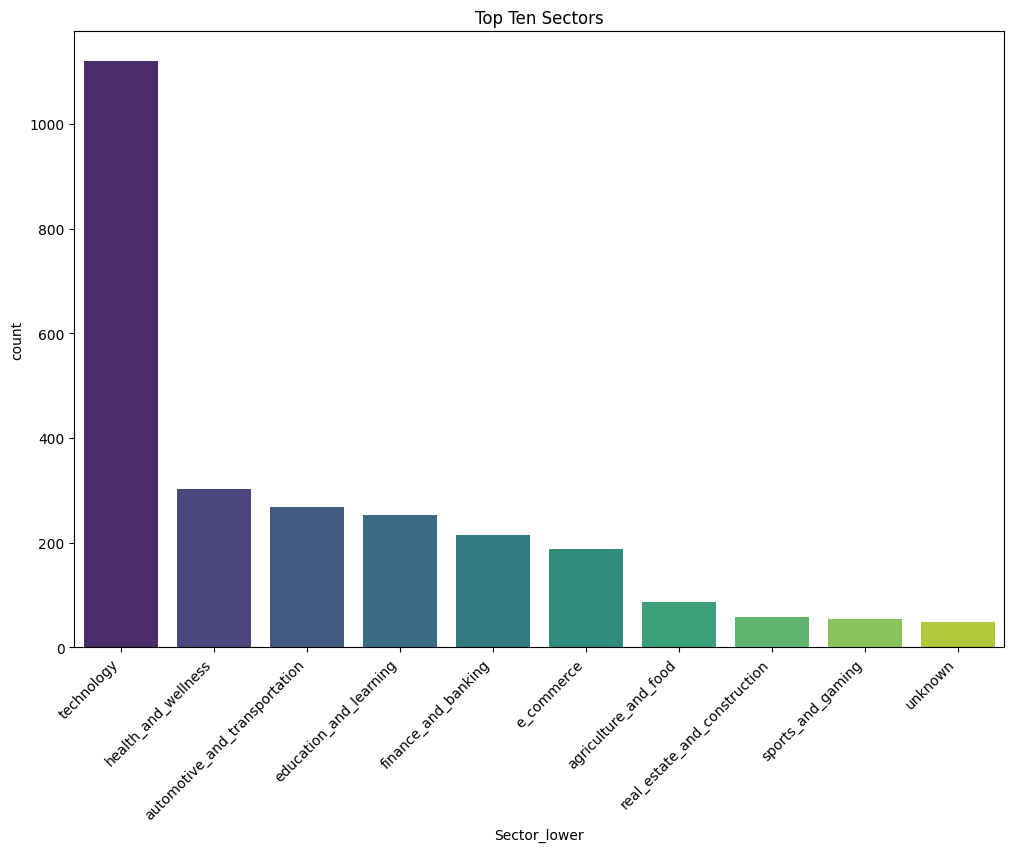

In [134]:


# Find the top ten sectors
top_ten_sectors = startup_funding_df['Sector'].str.lower().value_counts().nlargest(10).index

# Convert the 'Sector' column to lowercase and filter the DataFrame for only the top ten sectors
startup_funding_df['Sector_lower'] = startup_funding_df['Sector'].str.lower()
filtered_df = startup_funding_df[startup_funding_df['Sector_lower'].isin(top_ten_sectors)]

# Get the order of the top ten sectors based on count
order = filtered_df['Sector_lower'].value_counts().index

# Create the count plot with explicit order
plt.figure(figsize=(12, 8))
sns.countplot(x='Sector_lower', data=filtered_df, palette='viridis', order=order)
plt.title('Top Ten Sectors')
plt.xticks(rotation=45, ha='right')
plt.show()

# Drop the temporary column
startup_funding_df = startup_funding_df.drop(columns=['Sector_lower'])


As seen above, most startups in India are in the Technolgy sector.

### 1.6 Research Questions

<b>1. What is the overall trend in the total funding received by Indian start-ups from 2018 to 2021?

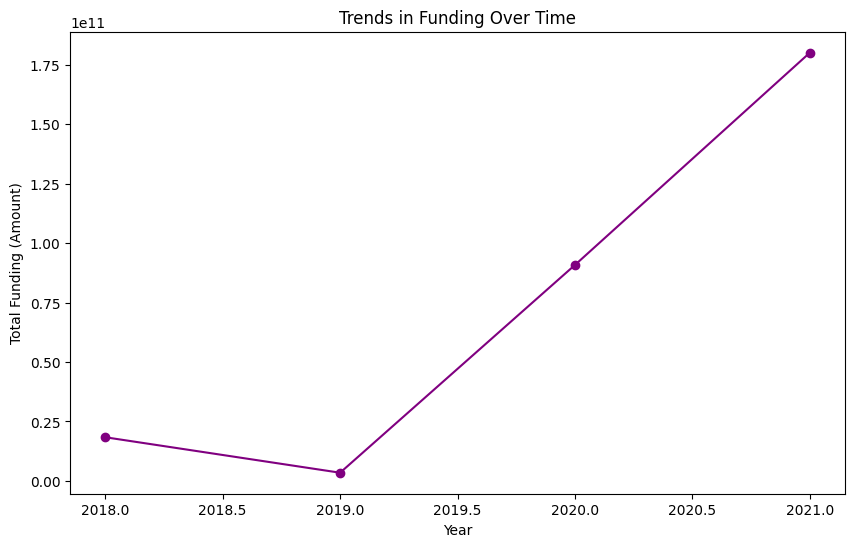

In [135]:
# Group the data by 'Year' and sum the 'Amount' for each year
funding_over_time = startup_funding_df.groupby('Year')['Amount($)'].sum()

# Plotting the trends in funding over time
plt.figure(figsize=(10, 6))
plt.plot(funding_over_time.index, funding_over_time.values, marker='o', color='purple')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding (Amount)')
plt.title('Trends in Funding Over Time')

# Show the plot
plt.show()


 <b>2.Which are the top 10 startup brands that received most funding in the Indian startup scene from 2018 to 2021?

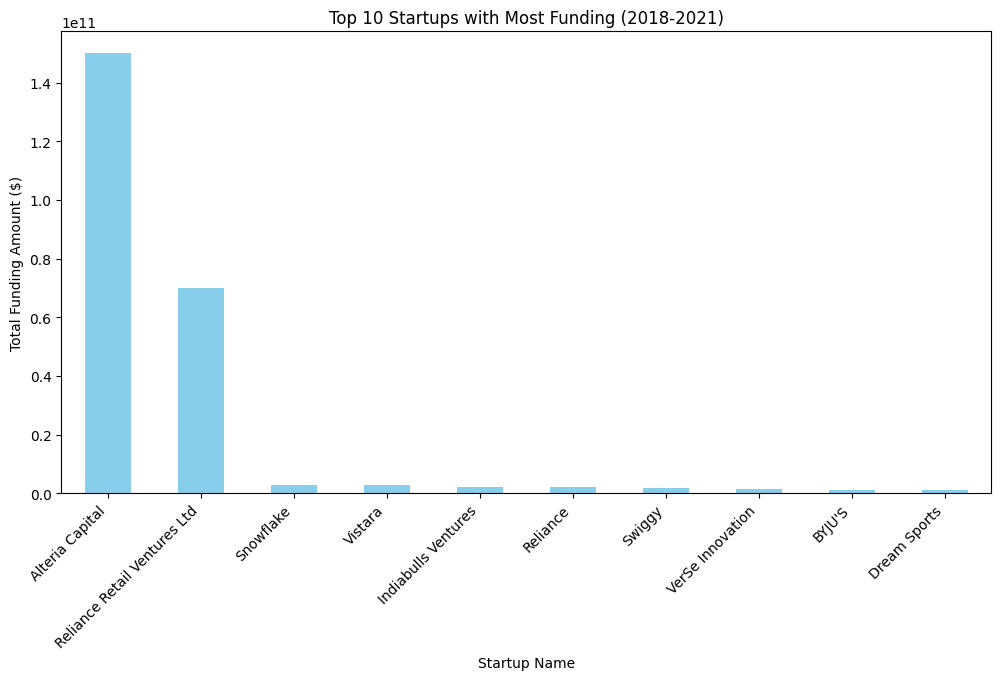

In [136]:


# Filter data for the years 2018 to 2021
filtered_df = startup_funding_df[startup_funding_df['Year'].between(2018, 2021)]

# Group by startup name and sum the funding amount
total_funding_by_startup = filtered_df.groupby('Company_Brand')['Amount($)'].sum()

# Get the top 10 startups
top_10_startups = total_funding_by_startup.nlargest(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_startups.plot(kind='bar', color='skyblue')
plt.title('Top 10 Startups with Most Funding (2018-2021)')
plt.xlabel('Startup Name')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(rotation=45, ha='right')
# Remove gridlines
plt.grid(False)
plt.show()


<b>3. Is the geographic location of a startup's headquarters a factor that impacts the funding it secures?

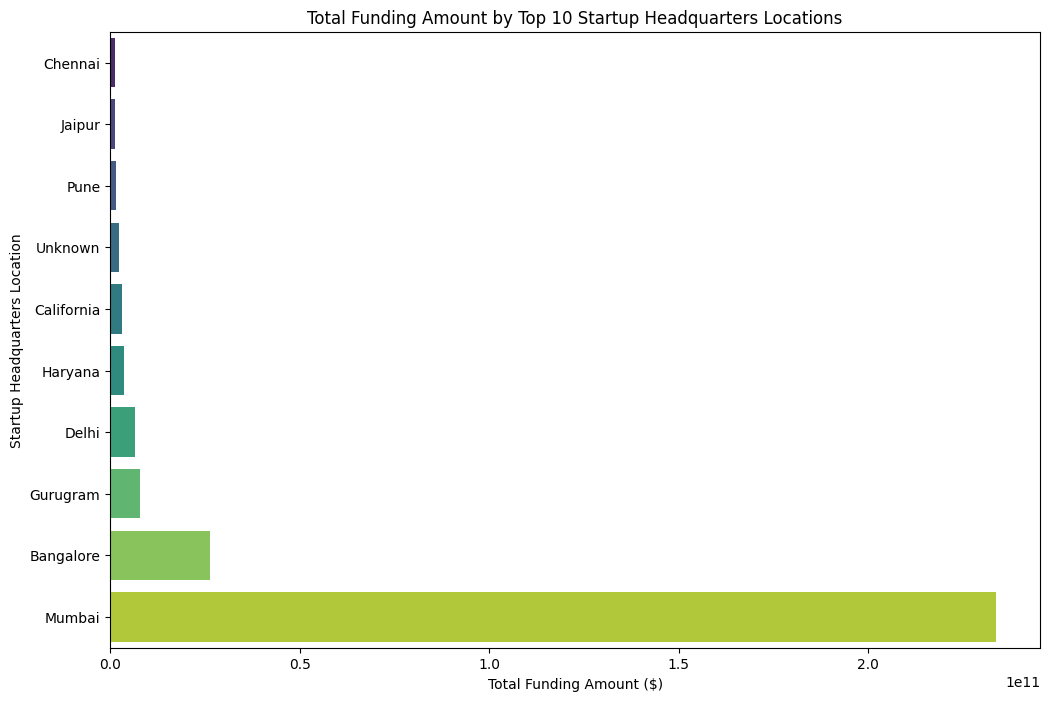

In [137]:


# Filter out the top 10 headquarters locations by total funding amount
top_locations = startup_funding_df.groupby('HeadQuarter')['Amount($)'].sum().nlargest(10).index
filtered_df = startup_funding_df[startup_funding_df['HeadQuarter'].isin(top_locations)]

# Sort the DataFrame by total funding amount in descending order
filtered_df = filtered_df.sort_values(by='Amount($)', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Amount($)', y='HeadQuarter', data=filtered_df, estimator=sum, ci=None, palette="viridis", order=top_locations[::-1])

plt.title('Total Funding Amount by Top 10 Startup Headquarters Locations')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Startup Headquarters Location')

# Show the plot
plt.show()


 <b> 4. Which top sectors have attracted the most funding?

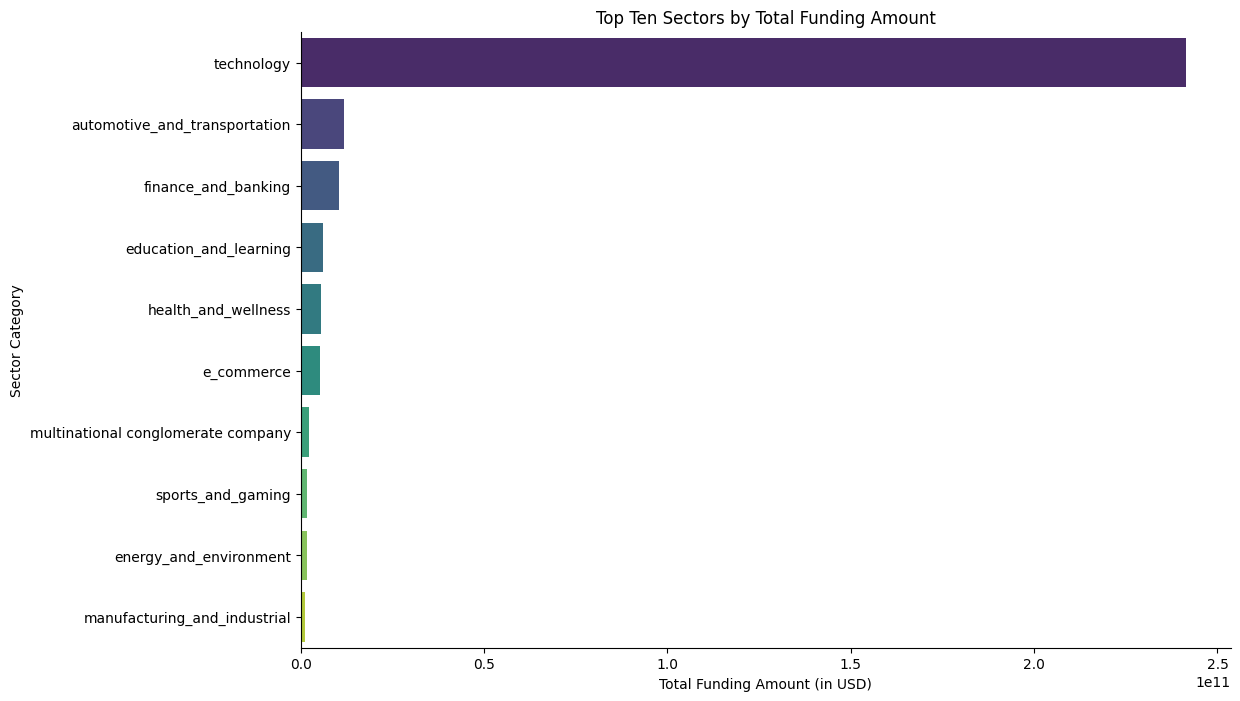

In [138]:
plt.figure(figsize=(12, 8))

# Calculate the total funding amount for each sector
total_funding_by_sector = startup_funding_df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False)

# Select only the top ten sectors
top_ten_sectors = total_funding_by_sector.head(10)

# Plot the bar plot
bar_plot = sns.barplot(x=top_ten_sectors.values, y=top_ten_sectors.index, palette="viridis")

# Add labels and title
bar_plot.set(xlabel='Total Funding Amount (in USD)', ylabel='Sector Category')
plt.title('Top Ten Sectors by Total Funding Amount')

# Remove the grid
sns.despine()

# Show the plot
plt.show()


5. <b>Which are top 5 stages that have the most funding?

In [139]:


# Calculate the total funding amount for each funding stage
total_funding_by_stage = startup_funding_df.groupby('Stage')['Amount($)'].sum()

# Select the top five funding stages
top_five_stages = total_funding_by_stage.sort_values(ascending=False).head(5)

# Print the top five funding stages and their amounts
print(top_five_stages)


Stage
Debt              1.505874e+11
Unknown           1.017563e+11
Series B          5.649233e+09
Series C          5.621780e+09
Private Equity    5.148960e+09
Name: Amount($), dtype: float64


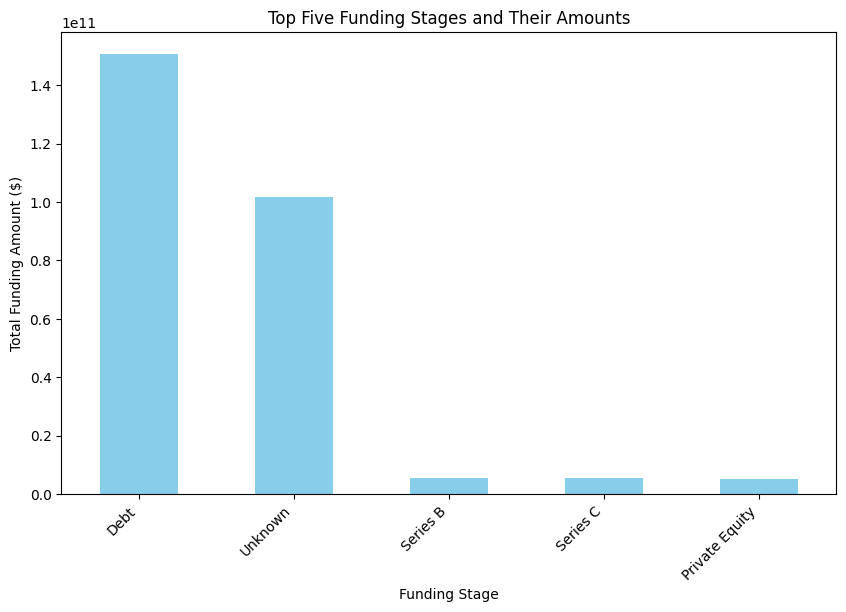

In [140]:
# Calculate the total funding amount for each funding stage
total_funding_by_stage = startup_funding_df.groupby('Stage')['Amount($)'].sum()

# Select the top five funding stages
top_five_stages = total_funding_by_stage.sort_values(ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_five_stages.plot(kind='bar', color='skyblue')
plt.title('Top Five Funding Stages and Their Amounts')
plt.xlabel('Funding Stage')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


## Hypothesis

Null Hypothesis (H0): There is no significant difference in the amount of funding received by different sectors.

Alternative Hypothesis (Ha): There is a significant difference in the amount of funding received by different sectors.

In [141]:
# Grouping funding amounts by sector
grouped_data = {sector: startup_funding_df[startup_funding_df['Sector'] == sector]['Amount($)'] for sector in startup_funding_df['Sector'].unique()}

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_data.values())

# Interpret the results
alpha = 0.05  # the significance level
print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in funding amounts among different sectors.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in funding amounts among different sectors.")


ANOVA Test Results:
F-statistic: 0.12302957671160172
p-value: 0.9999999402761456
Fail to reject the null hypothesis.
There is no significant difference in funding amounts among different sectors.


Based on the analysis conducted using the ANOVA test, I fail to reject the null hypothesis. The obtained p-value of 0.9999999402761456 indicates that there is no significant difference in funding amounts among different sectors. Therefore, I conclude that, based on the available data, the amount of funding received by various sectors does not show a statistically significant variance.

In [142]:
startup_funding_df.to_csv('startup_funding_df.csv', index=False)

In [143]:
startup_funding_df=pd.read_csv('startup_funding_df.csv')
startup_funding_df.head()


,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,finance_and_banking,Seed,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,agriculture_and_food,Seed,5840000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,finance_and_banking,Series A,9490000.0,Gurugram,Leading Online Loans Marketplace in India,2018
3,PayMe India,finance_and_banking,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,e_commerce,Seed,3530000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
